# Based on surprise_svd.py

In [1]:
from __future__ import unicode_literals # some movies have foreign chars
# install surprise with: pip install scikit-surprise
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from scipy.linalg import svd
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt

## Load and Process Data

In [2]:
# Load the movielens-100k dataset (download it if needed),
reader = Reader(line_format='user item rating', sep='\t')
trainset = Dataset.load_from_file('train.txt', reader).build_full_trainset()
raw_testset = Dataset.load_from_file('test.txt', reader).raw_ratings

# data does not have time stamps , so remove their placeholder None entry
testset = []
for i in range(len(raw_testset)):
    testset.append(raw_testset[i][0:3])
    
movieData = np.loadtxt('movies.txt', delimiter='\t', dtype='str', encoding='ISO-8859-1')

## Fit Model

In [3]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

print ('U matrix shape', algo.pu.shape)
print ('V matrix shape', algo.qi.shape)

Uu, su, Vhu = svd(algo.pu, full_matrices=False)
Ui, si, Vhi = svd(algo.qi, full_matrices=False)
print (Ui.shape, si.shape, Vhi.shape)
V_reduced = np.dot(algo.qi,Ui[1:3,:].T)
print (V_reduced)

RMSE: 0.9248
U matrix shape (943, 100)
V matrix shape (1668, 100)
(1668, 100) (100,) (100, 100)
[[ 0.00520384 -0.01933141]
 [ 0.035773    0.06687937]
 [ 0.02732881 -0.02469648]
 ...
 [ 0.00663722 -0.00711433]
 [ 0.03406385 -0.03189199]
 [-0.03226623  0.00796809]]


## Helper Functions

In [53]:
# visualizations
def plot_all(selection, perLabelShifts, title ="Visualization", filename="untitled"):
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(V_reduced[selection, 0], V_reduced[selection, 1], marker='o')
    for label, x, y, shift in zip(movieData[selection,1], V_reduced[selection, 0],
                                  V_reduced[selection, 1], perLabelShifts):
        plt.annotate(
            label,
            xy=(x, y), xytext=shift,
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->'))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.savefig(filename+".pdf")
    plt.show()
    return

## Generate Plots

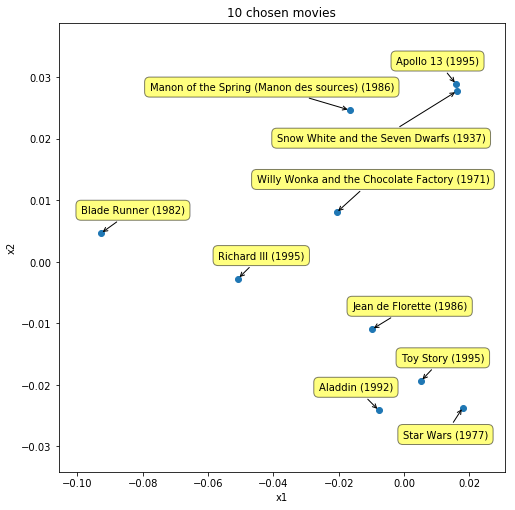

In [55]:
# 10 movies of choice
selection = [0, 9, 27, 49, 88, 94, 98, 150, 164, 165]
perLabelShifts = [(-20, 20), (-20, 20), (-60, 20), (-60, -30), (-20, 20), 
                  (-60, 20), (-180, -50), (-80, 30), (-20, 20), (-200, 20)]
plot_all(selection, perLabelShifts, '10 chosen movies', "visualization-10_chosen_movies")

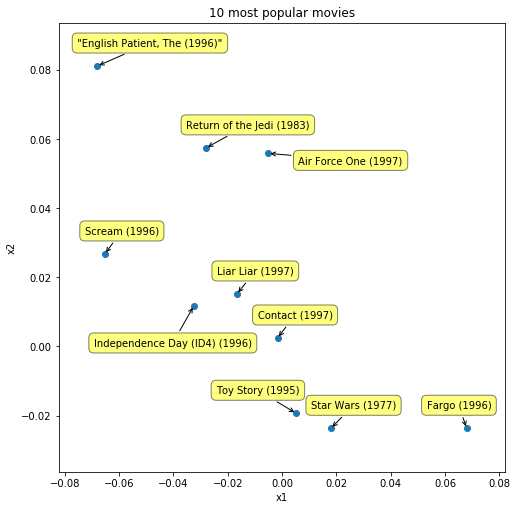

In [79]:
# 10 most popular movies
# Extract most popular movies and relevant rating data
ratingData = np.loadtxt('data.txt', dtype='int')
[ratings, counts] = np.unique(ratingData[:,2], return_counts=True)
[movieIDs, counts] = np.unique(ratingData[:,1], return_counts=True)
popularCountInd = np.argsort(counts)[-10:]
selection = movieIDs[popularCountInd] - 1 # get the indexes only
perLabelShifts = [(-100, -40), (30, -10), (-80, 20), (-20, 20), (-20, 20), 
                  (-20, 20), (-20, 20), (-40, 20), (-20, 20), (-20, 20)]
plot_all(selection, perLabelShifts, '10 most popular movies', "visualization-10_popular_movies")

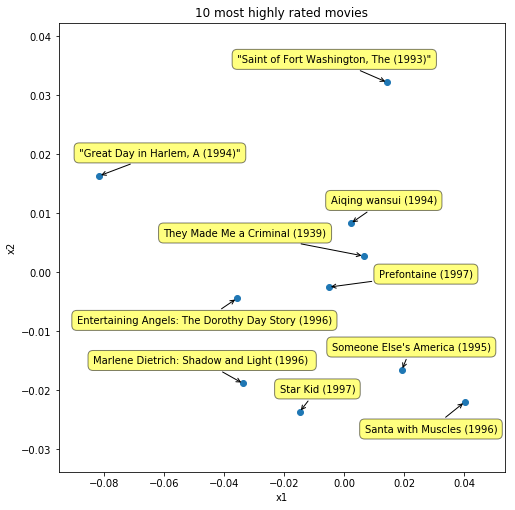

In [109]:
# 10 most higly rated:
movieIDs = np.unique(ratingData[:,1])
ratingArray = [[] for j in movieIDs]
for row in ratingData:
    ratingArray[row[1]-1].append(row[2])
averageRatings = [np.average(row) for row in ratingArray]
highlyRatedInd = np.argsort(averageRatings)[-10:]
selection = movieIDs[highlyRatedInd] - 1 # get the indexes only
perLabelShifts = [(-20, 20), (-100, -30), (50, 10), (-150, 20), (-70, 20), 
                  (-200, 20), (-20, 20), (-160, -25), (-150, 20), (-20, 20)]
plot_all(selection, perLabelShifts, '10 most highly rated movies', "visualization-10_best_movies")

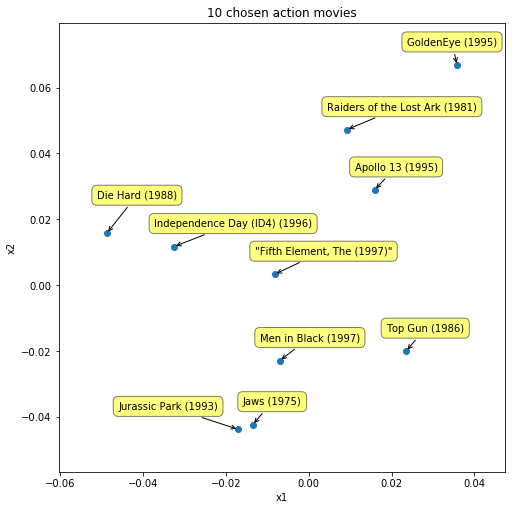

In [133]:
selection = [2-1, 28-1, 82-1, 121-1, 144-1, 161-1, 174-1, 234-1, 250-1, 257-1]
perLabelShifts = [(-50, 20), (-20, 20), (-120, 20), (-20, 20), (-10, 35), 
                  (-20, 20), (-20, 20), (-10, 20), (-20, 20), (-20, 20)]
plot_all(selection, perLabelShifts, '10 chosen action movies', "visualization-10_chosen_action_movies")

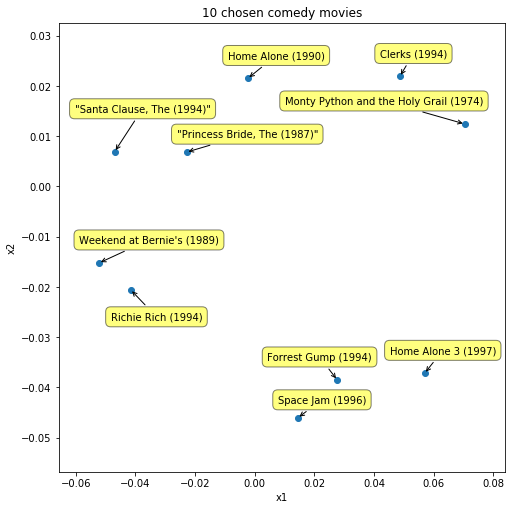

In [165]:
selection = [42-1, 63-1, 69-1, 94-1, 158-1, 168-1, 173-1, 795-1, 820-1, 894-1]
perLabelShifts = [(-20, 20), (-40, 40), (-70, 20), (-20, 20), (-20, 20), 
                  (-180, 20), (-10, 15), (-20, -30), (-20, 15), (-35, 20)]
plot_all(selection, perLabelShifts, '10 chosen comedy movies', "visualization-10_chosen_comedy_movies")

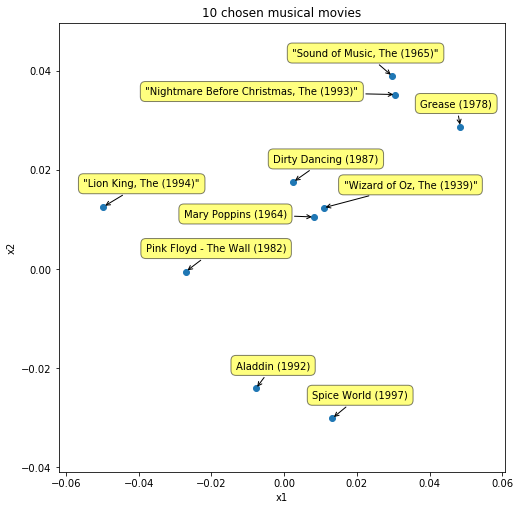

In [209]:
selection = [71-1, 91-1, 95-1, 132-1, 143-1, 155-1, 214-1, 352-1, 419-1, 451-1]
perLabelShifts = [(-20, 20), (-250, 0), (-20, 20), (20, 20), (-100, 20), 
                  (-20, 20), (-40, 20), (-20, 20), (-130, 0), (-40, 20)]
plot_all(selection, perLabelShifts, '10 chosen musical movies', "visualization-10_chosen_musical_movies")

## Extra Visualization

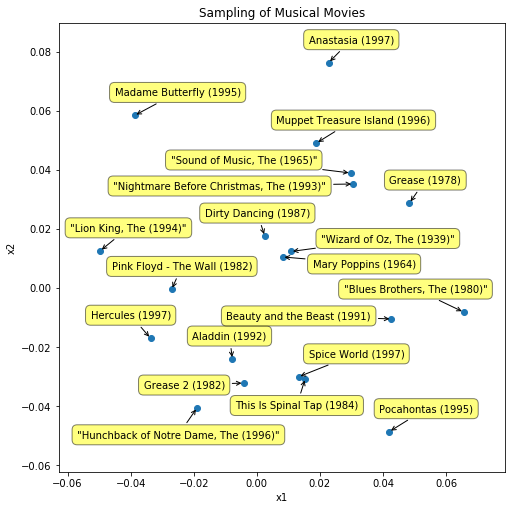

In [278]:
selection = [21-1, 71-1, 91-1, 95-1, 132-1,
             143-1, 155-1, 186-1, 209-1, 214-1,
             352-1, 419-1, 451-1, 538-1, 542-1,
             588-1, 596-1, 993-1, 1037-1, 1459-1]
perLabelShifts = [(-40, 20), (-30, 20), (-240, -5), (-40, 20), (30, 10),
                  (-180, 10), (-60, 20), (-120, 20), (-70, -30), (-60, 20),
                  (10, 20), (30, -10), (-20, 20), (-20, 20), (-10, 20),
                  (-165, 0), (-120, -30), (-60, 20), (-100, -5), (-20, 20)]
plot_all(selection, perLabelShifts, 'Sampling of Musical Movies', "extra-visualization-musical")